### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [15]:
# pip install newspaper3k

In [27]:
from newspaper import Article
url = 'https://www.bbc.com/sport/football/68460857'
article = Article(url)
article.download()
article.parse()

text=article.text
text

'Last updated on .From the section Premier League\n\nBrennan Johnson\'s fourth goal of the season gave Spurs a two-goal cushion early in the second half\n\nTottenham boosted their hopes of a top-four Premier League finish with an emphatic victory over 10-man Aston Villa at Villa Park.\n\nIn an encounter billed as pivotal in the race for a spot in next season\'s Champions League, early second-half goals from James Maddison and Brennan Johnson set Spurs on their way.\n\nAnd a seemingly leg-weary Villa side, who played at Ajax on Thursday evening, rarely looked capable of clawing their way back into the contest once captain John McGinn was dismissed for a reckless tackle on visiting left-back Destiny Udogie in the 65th minute.\n\nWith Spurs in complete control in the closing stages, stoppage-time goals from Son Heung-min and Timo Werner only served to rub salt into Villa\'s wounds.\n\nThe hosts remain fourth in the table but are now only two points above Ange Postecoglou\'s Spurs, who hav

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [53]:
import pandas as pd
from collections import Counter
import re
clean_text = re.sub(r'[^\w\s]', '', text.lower())
words = clean_text.split()
word_counts = Counter(words)
word_df = pd.DataFrame(word_counts.items(), columns=['단어', '횟수'])
word_df

,단어,횟수
0,last,1
1,updated,1
2,on,6
3,from,6
4,the,30
...,...,...
369,dragusin,1
370,749,1
371,5,1
372,højbjerg,1


1.3 불용어를 제거하시오.

In [55]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
filtered_words

[nltk_data] Downloading package stopwords to /Users/nawon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['last',
 'updated',
 'section',
 'premier',
 'league',
 'brennan',
 'johnsons',
 'fourth',
 'goal',
 'season',
 'gave',
 'spurs',
 'twogoal',
 'cushion',
 'early',
 'second',
 'half',
 'tottenham',
 'boosted',
 'hopes',
 'topfour',
 'premier',
 'league',
 'finish',
 'emphatic',
 'victory',
 '10man',
 'aston',
 'villa',
 'villa',
 'park',
 'encounter',
 'billed',
 'pivotal',
 'race',
 'spot',
 'next',
 'seasons',
 'champions',
 'league',
 'early',
 'secondhalf',
 'goals',
 'james',
 'maddison',
 'brennan',
 'johnson',
 'set',
 'spurs',
 'way',
 'seemingly',
 'legweary',
 'villa',
 'side',
 'played',
 'ajax',
 'thursday',
 'evening',
 'rarely',
 'looked',
 'capable',
 'clawing',
 'way',
 'back',
 'contest',
 'captain',
 'john',
 'mcginn',
 'dismissed',
 'reckless',
 'tackle',
 'visiting',
 'leftback',
 'destiny',
 'udogie',
 '65th',
 'minute',
 'spurs',
 'complete',
 'control',
 'closing',
 'stages',
 'stoppagetime',
 'goals',
 'son',
 'heungmin',
 'timo',
 'werner',
 'served',
 'rub',


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [60]:
#pip install wordcloud

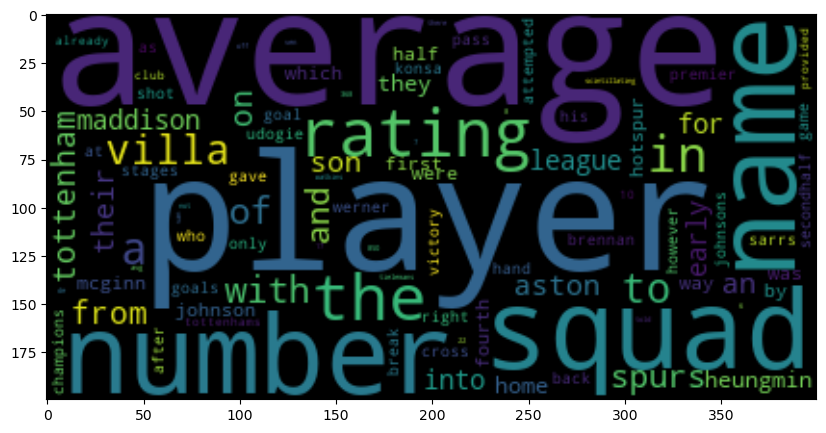

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

- 너무 어려워서...https://brave-greenfrog.tistory.com/44 이걸 열심히 따라 해봄 

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [71]:
# pip install selenium

In [9]:
import time
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')

driver = webdriver.Chrome(options=chrome_options)

In [10]:
url = 'https://play.google.com/store/apps/details?id=viva.republica.toss&hl=ko&gl=US' 

driver.get(url)
wait = WebDriverWait(driver, 3)

In [11]:
dates = driver.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews=driver.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = driver.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')

In [12]:
len(reviews)

3

In [16]:
all_reviews = driver.find_element(by=By.XPATH, value ='//*[@id="yDmH0d"]/div[4]/div[2]/div/div/div/div/div[2]')

for i in range(10):
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', all_reviews)
    time.sleep(3)

In [17]:
data = pd.DataFrame(data=[], columns=['날짜','리뷰','별점'])
#날짜, 리뷰, 별점 수집
dates = driver.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews=driver.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = driver.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')


# k개의 리뷰를 수집합니다.
for i in range(len(reviews)):
    tmp = []
    tmp.append(dates[i].text)
    tmp.append(reviews[i].text)
    tmp.append(stargrades[i].get_attribute('aria-label'))

    tmp = pd.DataFrame(data=[tmp], columns = data.columns)
    data = pd.concat([data,tmp])
    
print("토스 앱 리뷰 수집 완료")


data.reset_index(inplace=True, drop=True)
data

토스 앱 리뷰 수집 완료


,날짜,리뷰,별점
0,,,별표 5개 만점에 4개를 받았습니다.
1,,,별표 5개 만점에 4개를 받았습니다.
2,,많은 인터렉션 탓에 매번 버벅입니다. 인터렉션을 최소화하여 응답 속도가 빨라질 수 ...,별표 5개 만점에 2개를 받았습니다.
3,2024년 3월 14일,"최신 업데이트 후 상세화면이 나타나지 않습니다. 첫화면의 하단의 버튼에서 홈, 혜택...",별표 5개 만점에 4개를 받았습니다.
4,2024년 3월 13일,하나의 단일 앱에 너무 많은 기능이 포함되어 있다보니 백그라운드 배터리 소모도 심하...,별표 5개 만점에 4개를 받았습니다.
...,...,...,...
238,2024년 1월 13일,점점 초심을 잃어가는 토스~ 대출 끝나면 안 씁니다. 금리도 계속 올리고 포인트는 ...,별표 5개 만점에 1개를 받았습니다.
239,2024년 2월 25일,토스페이(머니)로 이체하려고 할때 결제하기 버튼을 누르면 화면이 사라지고 돈은 이체...,별표 5개 만점에 4개를 받았습니다.
240,2024년 2월 26일,폰바꿀때마다 신분증 인증을 또해야하나요... 다른 금융앱들은 계좌인증만 하면 되는데...,별표 5개 만점에 1개를 받았습니다.
241,2024년 2월 16일,케땡뱅크 금리가 조금 더 높지만 토스를 사용했던 건 이자를 따로 모을 수 있어서였는...,별표 5개 만점에 2개를 받았습니다.


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [20]:
import re

tmp = data.copy()

tmp['별점'] = tmp['별점'].apply(lambda x : x[5:])

m = re.compile('[0-9][\.0-9]*') #정규표현식

tmp['별점'] = tmp['별점'].apply(lambda x : m.findall(x)[0])
tmp['별점']

tmp.별점 = tmp.별점.astype(float)

high=tmp[tmp['별점']>3]

high

,날짜,리뷰,별점
0,,,4.0
1,,,4.0
3,2024년 3월 14일,"최신 업데이트 후 상세화면이 나타나지 않습니다. 첫화면의 하단의 버튼에서 홈, 혜택...",4.0
4,2024년 3월 13일,하나의 단일 앱에 너무 많은 기능이 포함되어 있다보니 백그라운드 배터리 소모도 심하...,4.0
10,2024년 1월 11일,토스 만보기 기능을 잘 이용하고 있는 사용자입니다 이번에 업데이트가 되면서 포인트를...,4.0
...,...,...,...
217,2024년 3월 10일,다 좋고 소수점 매수 수수료 작은게 진짜 좋다 다이렉트 인덱싱 기능 있으면 더 좋겠다,5.0
228,2024년 3월 10일,"크리스마스 한정판 케릭터가 사라졌어요, 500포인트로 영구소장 한건데, 환불내역도 ...",4.0
230,2024년 3월 13일,이번에 새로 바뀐 케릭터 중 소장중인 크리스마스 한정탬 인 루돌프 케릭터 하나가 보...,4.0
234,2024년 2월 21일,와.... 제가 써본 은행중에 최고입니다 수수료 없는게 많고 브랜드콘 같은거도 살수...,5.0


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [23]:
# pip install summa

In [29]:
from summa.summarizer import summarize

article_sum = summarize(text)
print(article_sum)

Brennan Johnson's fourth goal of the season gave Spurs a two-goal cushion early in the second half
In an encounter billed as pivotal in the race for a spot in next season's Champions League, early second-half goals from James Maddison and Brennan Johnson set Spurs on their way.
Tottenham Tottenham Hotspur Tottenham Hotspur Aston Villa Avg Squad number 1 Player name E Martínez Average rating 4.19 Squad number 11 Player name Watkins Average rating 4.11 Squad number 2 Player name Cash Average rating 3.97 Squad number 14 Player name P Torres Average rating 3.78 Squad number 6 Player name Douglas Luiz Average rating 3.77 Squad number 17 Player name Lenglet Average rating 3.68 Squad number 4 Player name Konsa Average rating 3.68 Squad number 31 Player name Bailey Average rating 3.65 Squad number 12 Player name Digne Average rating 3.61 Squad number 8 Player name Tielemans Average rating 3.55 Squad number 19 Player name Diaby Average rating 3.48 Squad number 7 Player name McGinn Average ratin